# Week 3

## Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

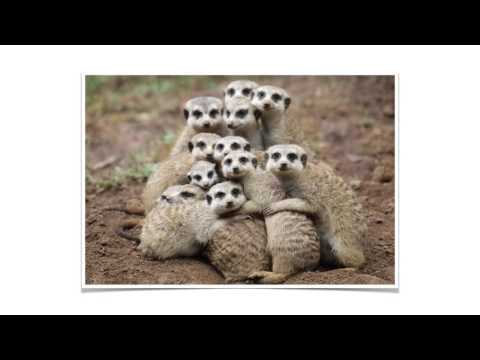

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
>   * It's explained how real network are not often represented well by random networks. In real network we observe many nodes with a significant number of highly connected nodes and large differences in node degrees.
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
>   * Subcritical Regime $ \langle k \rangle $ < 1:
>        - No giant component
>        - Cluster size distribution: $ p_s \approx s^{-3/2} e^{- \alpha s} $
>        - Size of the largest cluster: $ N_G \approx ln(N) $
>        - The clusters are trees  
>   * Critical Point $ \langle k \rangle $ = 1:
>        - No giant component
>        - Cluster size distribution: $p_s \approx s^{-3/2} $
>        - Size of the largest cluster: $ N_G \approx N^{3/2} $
>        - The clusters may contain loops
>   * Supercritical Regime $ \langle k \rangle $ > 1:
>        - Single giant component
>        - Cluster size distribution: $ p_s \approx s^{-3/2} e^{- \alpha s} $
>        - Size of the giant component: $ N_G \approx (p - p_c ) N $
>        - The small clusters are trees
>        - Giant component has loops
>   * Connected Regime $ \langle k \rangle $ >> ln(N):
>        - Single giant component
>        - No isolated nodes or clusters
>        - Size of the giant component: $ N_G = N $
>        - Giant component has loops
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
>   * In a random network the local clustering coefficient is independent of the node’s degree and $ \langle C \rangle $ depends on the system size as it decreases as $\frac{1}{N} $. For real networks $C(k)$ decreases with the node degrees and is largely independent of the system size $ N $.


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np

Average shortest path length <d> for p=0:  62.875751503006015
Average shortest path length <d> for p=0.1:  7.87650501002004
Average shortest path length <d> for p=1:  4.753923847695391

The average shortest path for a random network:  4.4828921423310435
Average shortest path length <d> for p= 0.0 :  62.875751503006015
Average shortest path length <d> for p= 0.05 :  11.249763527054109
Average shortest path length <d> for p= 0.1 :  7.4784769539078155
Average shortest path length <d> for p= 0.15 :  6.577539078156312
Average shortest path length <d> for p= 0.2 :  6.015943887775551
Average shortest path length <d> for p= 0.25 :  5.848961923847695
Average shortest path length <d> for p= 0.3 :  5.568440881763527
Average shortest path length <d> for p= 0.35 :  5.278685370741483
Average shortest path length <d> for p= 0.4 :  5.257659318637274
Average shortest path length <d> for p= 0.45 :  5.058557114228457
Average shortest path length <d> for p= 0.5 :  4.998356713426854
Average shortest path l

Text(0.5, 1.0, 'Average path length for different values of p with error bars')

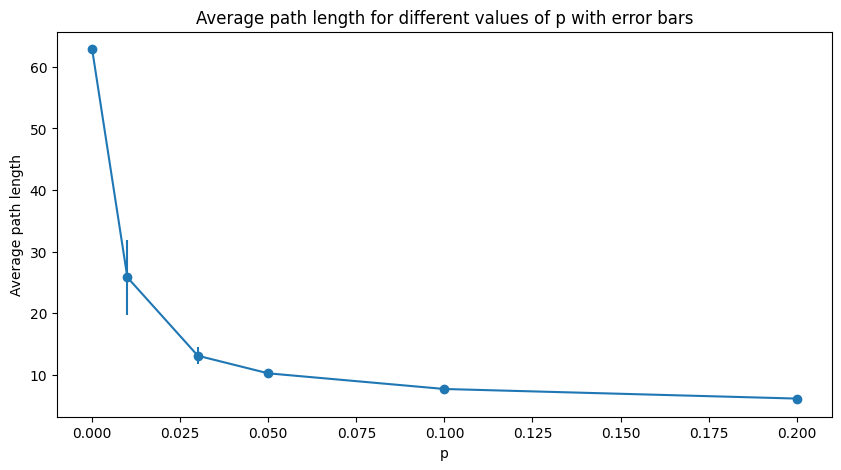

In [13]:
# Exercsise on Watts-Strogatz graphs
Graph1 = nx.watts_strogatz_graph(500, 4, 0)
Graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
Graph3 = nx.watts_strogatz_graph(500, 4, 1)
print("Average shortest path length <d> for p=0: ", nx.average_shortest_path_length(Graph1))
print("Average shortest path length <d> for p=0.1: ", nx.average_shortest_path_length(Graph2))
print("Average shortest path length <d> for p=1: ", nx.average_shortest_path_length(Graph3))

# when p=1 all the links are rewired randomly, so the graph is equivalent to a random graph with the same number of nodes and edges this 

# for a random network the average shortest path length is ln(n)/ln(k)
avg_shortest_path_ram = math.log(500)/math.log(4)
print("\nThe average shortest path for a random network: ", avg_shortest_path_ram)
for i in range(0,105,5):
    G = nx.watts_strogatz_graph(500, 4, i/100)
    print("Average shortest path length <d> for p=",i/100,": ", nx.average_shortest_path_length(G))
# the value of p for which the average shortest path length is close to that of a random network is 1 

# investigate the behavior in details with a plot
list_p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
res = [[] for _ in range(len(list_p))]
for p in list_p:
    for i in range(50):
        graph = nx.watts_strogatz_graph(500, 4, p)
        avg_shortest_path = nx.average_shortest_path_length(graph)
        res[list_p.index(p)].append(avg_shortest_path)
sd = [np.std(x) for x in res]
mean = [np.mean(x) for x in res]

plt.figure(figsize=(10, 5))
plt.errorbar(list_p, mean, yerr=sd, fmt='-o')
plt.xlabel('p')
plt.ylabel('Average path length')
plt.title('Average path length for different values of p with error bars')

The plot above shows how the average path length decreases for different values of p (the re-wiring factor) for 50 Watts-Strogatz graphs with $N = 500$ and average degree $ \langle k \rangle = 4 $. The plot also includes the standard deviation error bars. It can be seen that the average path length $ \langle d \rangle $ decreases very quickly even when p is small indicating that a little re-wiring can shorten the paths between nodes by a lot.  

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

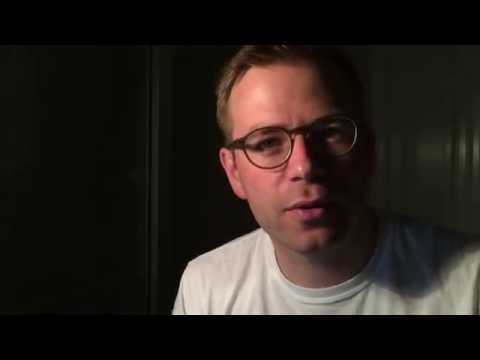

In [14]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
>   * Anomalous Regime ($\gamma$≤ 2): where the exponent 1/($\gamma$− 1) is larger than one so the number of links connected to the largest hub scales more than the size N of the network. "Large scale-free network with $\gamma$ < 2, that lack multi-links, cannot exist"
>   * Scale-Free Regime (2 < $\gamma$< 3): where the first moment of the degree distribution is finite but the second and third moments diverge for $N \rightarrow \inf $. This creates ultra small scale free networks (majority of the ones we know). 
>   * Random Network Regime ($\gamma$ > 3): where both the first and second moments are finite. These are hard to distinguish from random networks of similar sizes. They tend to converge to the small-world situation becasue for large $\gamma$ the degree distribution $ p_k $ decays sufficiently fast to make the hubs small and less numerous.

> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
>   * Sublinear Preferential Attachment (0 < $\alpha$ < 1): for any $\alpha$ > 0 new nodes favor the more connected nodes over the less connected nodes but for $\alpha$ < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. It limits the size and the number of the hubs.
>   * Linear $\alpha = 1$: here probability of a new node connecting to an existing node is directly proportional to the existing node's degree. This linear relationship results in a scale-free network with a power-law degree distribution. Normal hubs like like in standard scale-free networks.
>   * Superlinear Preferential Attachment ($\alpha$ > 1): for $\alpha$ > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. For $\alpha$ > 2 this is even more visible all nodes connect to a few super-hubs acting in a "winner-takes-all" dynamic.

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

The maximum degree of a barbasi-albert network with 5000 nodes is: 16
The minimum degree of a barbasi-albert network with 5000 nodes is 1


Text(0.5, 1.0, 'Degree Distribution (Log-Log Scale)')

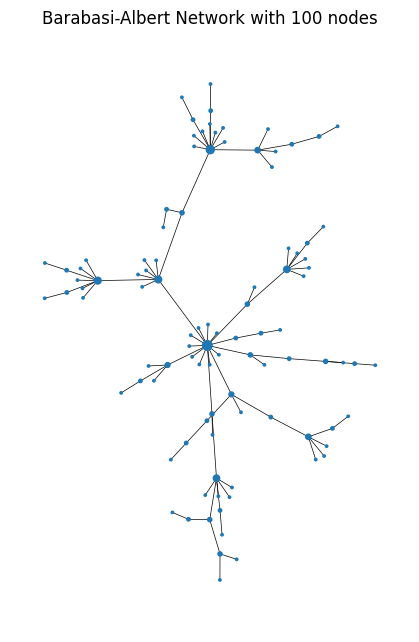

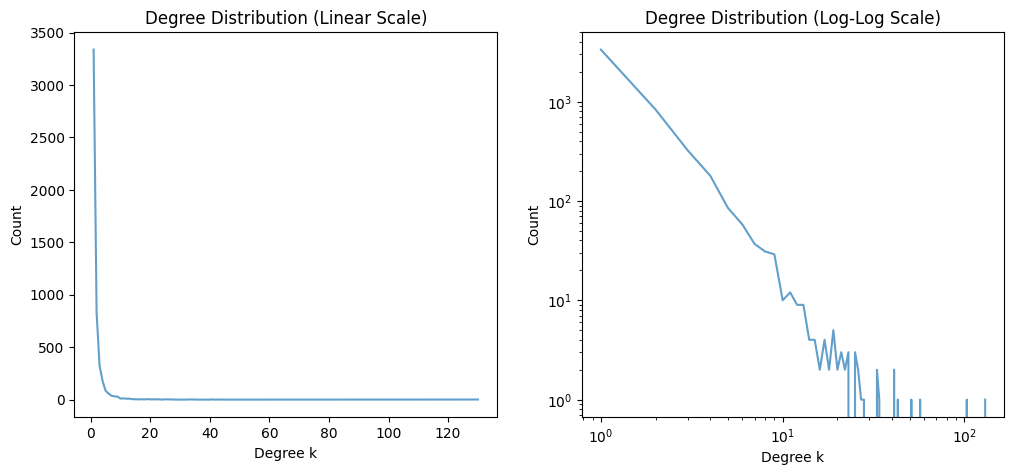

In [15]:
def build_barabasi_albert(n):
    # graph with 2 nodes and a single link
    G = nx.Graph()
    G.add_edge(0, 1)

    # add new nodes until the network has n nodes
    for i in range(2, n):
        # list where more connected nodes appear more often
        target_nodes = [node for edge in G.edges() for node in edge]
        target_node = np.random.choice(target_nodes)
        G.add_node(i)
        G.add_edge(i, target_node)
    return G

G = build_barabasi_albert(100)

# plot the network
plt.figure(figsize=(4, 6))
nx.draw(G, with_labels=False, width=0.5, node_size=[dict(G.degree)[k]*3 for k in dict(G.degree)])
plt.title("Barabasi-Albert Network with 100 nodes")

G5000 = build_barabasi_albert(5000)
print("The maximum degree of a barbasi-albert network with 5000 nodes is:", max(dict(G.degree).values()))
print("The minimum degree of a barbasi-albert network with 5000 nodes is", min(dict(G.degree).values()))

# bin the dirtubution with np.histgram and plot with linear and log-log axes
hist, bin_edges = np.histogram(list(dict(G5000.degree).values()), bins=range(1, max(dict(G5000.degree).values()) + 1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bin_edges[:-1], hist, alpha=0.7)
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Scale)')

plt.subplot(1, 2, 2)
plt.plot(bin_edges[:-1], hist, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Scale)')


# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>   * The fraction of times the paradox is true will be higher since $\gamma = 2$ is at the boundary of the Anomalous Regime ($\gamma$≤ 2), where the exponent 1/($\gamma$− 1) is larger than one so the number of links connected to the largest hub scales more than the size N of the network. This makes the power law is flatter so the degree of the biggest hub grows linearly with the system size creating a hub and spoke configuration in which all nodes are close and connected to each other via the same hub.

>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>           * Yes, factor like those can make a difference. For example assortativity [(here)](https://touroscholar.touro.edu/cgi/viewcontent.cgi?article=1151&context=lcas_pubs) (similar degree node tend to connect) can reduce the possibility of a low-degree node to connect with an hub. Clustering in oppsition can increase the frequency of the paradox making neighborhoods more redundant if a hub is present at the center of a neighborhood. 
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)
>           * We could run the test of the friendship paradox for a larger numeber of tirals, while changing the seed in the BA build function and track the results for multiple iterations of this process. Once the data is recorded we could find the mean and std of the data and plot it adding error bars. 

<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.
>       * Degree Distribution:
>           - ER Network: The degree distribution is narrow and sharply peaked, resembling a Poisson distribution. As seen in the linear plot, the vast majority of nodes have a degree very close to the average $ \langle k \rangle = 2 $. Nodes with degrees much higher than the average are rare. The tail of the distribution drops off very quickly.
>           - Sune-Network: The degree distribution is broader. While it also peaks at a low degree, it has a "fatter tail," meaning there is a higher probability of finding nodes with a larger number of connections compared to the ER network. This is clearly visible in the log-log plot, where the blue line is consistently above the orange line for the right half of the plot. This happens because of the growth mechanism where nodes that are added earlier have more opportunities to accumulate links and become hubs.
>       * Connected Components:
>           - ER Network: The output number of connected components in ER network is 788. This shows that the network is fragmented. It consists of one large "giant component" and many smaller, disconnected components and isolated nodes.
>           - Sune-Network: The output number of connected components in Sune network is 1. This shows that the network is fully connected. This is a direct result of its growth process, where every new node is required to attach to the existing network, ensuring that the entire graph remains a single piece.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

In [16]:
# Exercisse the friendship paradox in BA networks
def test_friendship_paradox(graph, trials):
    count = 0
    for _ in range(trials):   
        random_node = np.random.choice(list(graph.nodes()))
        neighbors = list(graph.neighbors(random_node))
        avg_degree_neighbors = np.mean([graph.degree(neighbor) for neighbor in neighbors])
        if avg_degree_neighbors > graph.degree(random_node):
            count += 1
    print("Friendship paradox holds for", count, "out of", trials, "trials.")

F_BA = build_barabasi_albert(5000)
test_friendship_paradox(F_BA, 1000)

Friendship paradox holds for 858 out of 1000 trials.


In [17]:
# Exercise the friendship paradox more generally
gamma = 2
N = 5000
x_min = 1
degree_distribution = [round(x_min*((1-np.random.random())**(-1/(gamma - 1)))) for _ in range(N)]
if sum(degree_distribution) % 2 != 0:
    degree_distribution[0] += 1  # make the sum even

F_powerlaw = nx.configuration_model(degree_distribution)
test_friendship_paradox(F_powerlaw, 1000)

Friendship paradox holds for 965 out of 1000 trials.


In [18]:
# Exercise the friendship paradox and the configuration model
F_CM = build_barabasi_albert(5000)
test_friendship_paradox(F_CM, 1000)

Friendship paradox holds for 862 out of 1000 trials.


Sune network has 5000 nodes and 4999 links.


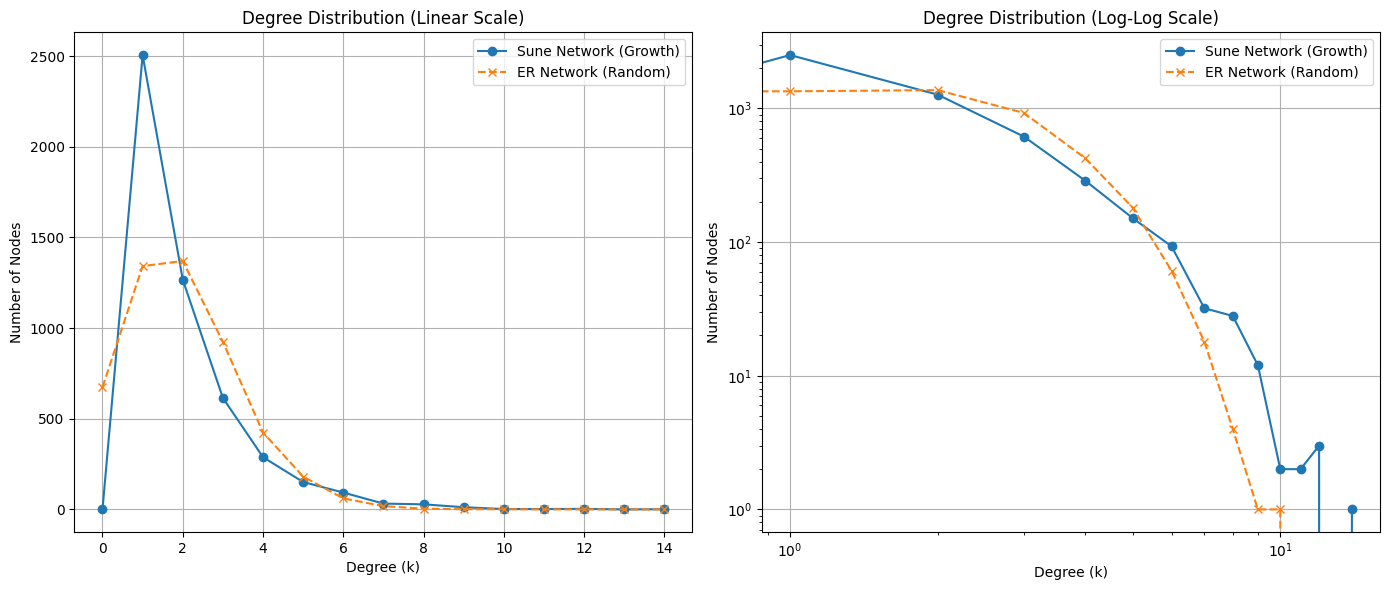

Number of connected components in Sune network: 1
Number of connected components in ER network: 788


In [22]:
# Exercise growth without preferential attachment
def build_random_growth(n):
    # graph with 2 nodes and a single link
    G = nx.Graph()
    G.add_edge(0, 1)

    # add new nodes until the network has n nodes
    for i in range(2, n):
        target_node = np.random.choice(list(G.nodes()))
        G.add_node(i)
        G.add_edge(i, target_node)
    return G

Sune = build_random_growth(5000)
N = Sune.number_of_nodes()
m = Sune.number_of_edges()
print(f"Sune network has {N} nodes and {m} links.")

ER = nx.gnm_random_graph(N, m)

# Get degree distributions
sune_degrees = [d for n, d in Sune.degree()]
er_degrees = [d for n, d in ER.degree()]

# Create histograms
max_degree = max(max(sune_degrees), max(er_degrees))
bins = np.arange(0, max_degree + 2)

sune_hist, _ = np.histogram(sune_degrees, bins=bins)
er_hist, _ = np.histogram(er_degrees, bins=bins)

# Plotting
plt.figure(figsize=(14, 6))

# Linear scale plot
plt.subplot(1, 2, 1)
plt.plot(sune_hist, label='Sune Network (Growth)', marker='o', linestyle='-')
plt.plot(er_hist, label='ER Network (Random)', marker='x', linestyle='--')
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution (Linear Scale)")
plt.legend()
plt.grid(True)

# Log-log scale plot
plt.subplot(1, 2, 2)
plt.loglog(sune_hist, label='Sune Network (Growth)', marker='o', linestyle='-')
plt.loglog(er_hist, label='ER Network (Random)', marker='x', linestyle='--')
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution (Log-Log Scale)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare connected components
print(f"Number of connected components in Sune network: {nx.number_connected_components(Sune)}")
print(f"Number of connected components in ER network: {nx.number_connected_components(ER)}")
